# Sales forecast for e-commerce platform "Streamchick"

##### Contents

**Research purpose:** determine criteria of success for games and forecast ad-campaigns on 2017

**Objectives:** 

1. Data cleaning. 
2. Determine success criterea for games based on historical data
3. Check the hypothesis
4. Forecast for 2017 year

**Data description:** table with historical data on game sales, user and expert ratings, geners and platforms (consoles) from 1980 to 2016 years.

**Research design:**

1. Data pre-processing and cleaning: missing values and duplicates
2. Data analysis
3. Agregation
4. Hypothesis check

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st

In [3]:
data = pd.read_csv(r'C:\Users\Pavel\Downloads/games.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.shape

(16715, 11)

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


As we can see, the table contents data on game sales from 1980 to 2016 with user and critic ratings, genres and platforms.

The tables consists 11 columns and 16715 raws.

### Data pre-processing and cleaning: missing values and duplicates

In [6]:
#changing column names on lower string

data.columns = data.columns.str.lower() 

#### Changing datatypes to relevant

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data[data['name'].isna()] #have a look at the missing values of the cloumn
data = data.dropna(subset = ['name']) #drop missing raw of the column

In [9]:
len(data[data['year_of_release'].isna()]) #count empty lines of the column year_of_release
#they are slightly more than 1,5%

269

In [10]:
data = data.dropna(subset = ['year_of_release']) #drop empty lines year_of_release

In [11]:
data.shape #we have 16444 rows

(16444, 11)

In [12]:
len(data[data['critic_score'].isna()]) #count empty lines column critic_score

8461

In [13]:
data['name'].value_counts().head() #rank the most popular games among platforms

name
Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
Terraria                        8
Name: count, dtype: int64

In [14]:
data.query('name == "Need for Speed: Most Wanted"')
#as it seen game with the exact same name could be released in different years
#and has different rating, 
#therefore we could not fill null values with respective values from another platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [15]:
data['user_score'].value_counts(dropna=False) #count empty lines of the column user_score

user_score
NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64

In [16]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 
#convert column to numeric type, text value tbd change for NaN
data['user_score'].describe() #check the format

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [17]:
data['rating'].value_counts(dropna=False) #count empty lines of the column rating
#as it seen more that six thousands are null

rating
NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [18]:
data['rating'] = data['rating'].fillna('No rating') 
#fill null values with a new category No rating

In [19]:
data['rating'].value_counts(dropna=False) #checking that all values are not null

rating
No rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: count, dtype: int64

In [20]:
data.duplicated().sum() #check the exact duplicates

0

In [21]:
data[data.duplicated(subset=['name', 'platform'])] #checking near duplicates with a pair name-platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [22]:
data.query('name == "Need for Speed: Most Wanted" & platform == "X360"') 
#closer look at the first duplicate pair - obviously not a duplicate -
#the game was released in different years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [23]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])] 
#checking near duplicates on three parameters on the same time - name,platform and year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [24]:
data.query('name == "Madden NFL 13" & platform == "PS3"') 
#as it seen one row divided on two, the second one has 0.01 mln EU sales only

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [25]:
data.loc[604, 'eu_sales'] = data.loc[604, 'eu_sales'] + data.loc[16230, 'eu_sales']
#adding sales from the row 16230 to row 604
data.loc[604, 'eu_sales'] #checking that

0.23

In [26]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
#deliting the row with duplicate
data = data.reset_index(drop=True) #reset index

data.duplicated(subset=['name', 'platform', 'year_of_release']).sum() 
#now all the duplicates are gone

0

In [27]:
data.shape

(16443, 11)

**Comments**

In the **name** column there are two missing values and rows are almost empty, deliting them as they are not valuable and we could not fill them. Probably, there are just broken  rows - two lines just peanuts.

In the **year_of_release** column, there are about 1.5% missing values from the total, we are dropping them as we could not fill it with trustworthy data.

In the **critic_score** column there are plenty of missing values, but filling them is not possible - as every rating is unique not only for the exact game but also for the exact platform on which this game was released. Missing values are not a problem since the non-null values amount is sufficient for further analysis.

**user_score** column should be convert into float type, tbd value (to be decided or to be determined, in fact, is null-value) change on NaN with a help of **errors = 'coerce'**.

In the **rating** column rows are strings (characters), there are 6764 missing values, changing them on 'No rating' for the future analysis.

Obviously, one platform should not have the same name game twice or more, checking near-duplicates on two parameters - name-platform, we have several results. Since the game Need for Speed: Most Wanted, apparently, was released more than one time with the same name (and these results are not duplicates), adding to the filter also parameter year_of_release. There is only one row with a duplicate, which possibly contains the sale part of the original row. Adding the value of the row to the original one and deleting the duplicate.

After data preprocessing there is 16443 lines or 98% of the raw data.

#### Counting total sales in a separate column

In [28]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
#adding the new column with total sales

In [29]:
data.head() #looking at the result

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No rating,31.38


### Research analysis

#### How many games were released by year

<Axes: xlabel='year_of_release'>

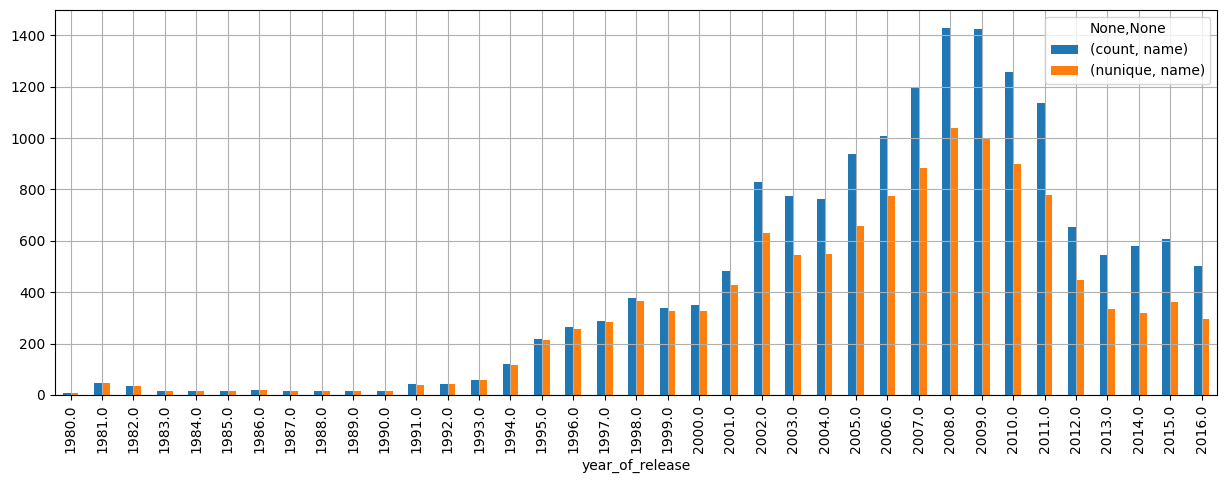

In [30]:
data.pivot_table(index='year_of_release' , values='name', 
                 aggfunc=['count', 'nunique']).plot.bar(figsize=(15,5), grid=True)
#counting data by year, games released and platform
#and unique games

#### Checking dynamic of sales by platform to define top-platforms.

<Axes: xlabel='platform'>

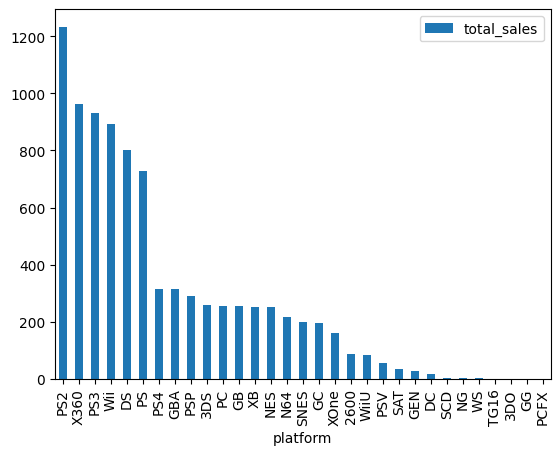

In [31]:
platforms_by_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
#table of total sales by platform sorted by volume (desceinding)
platforms_by_sales.plot.bar()
#making a barplot

<Axes: title={'center': 'Sales dynamic by top-6 platforms'}, xlabel='Year', ylabel='Mln copies sold'>

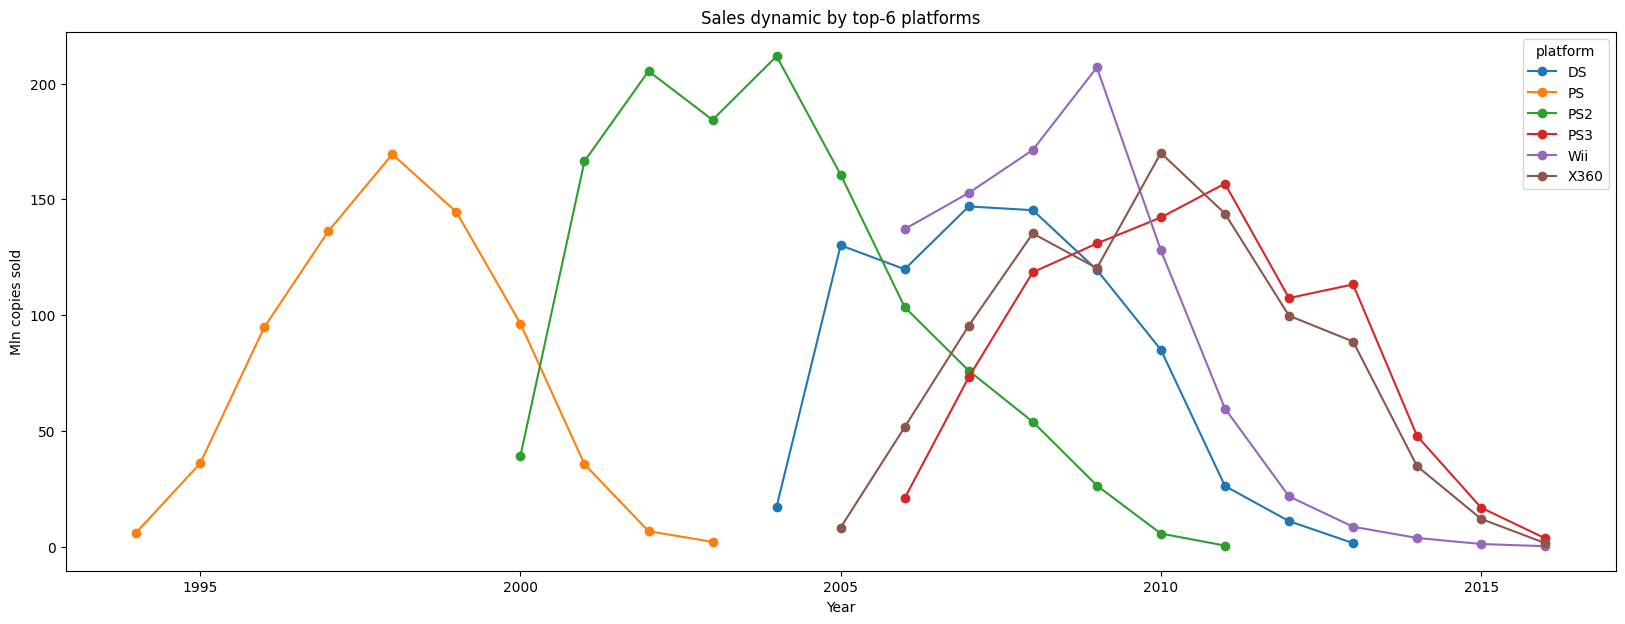

In [35]:
top_6_platforms = platforms_by_sales.query('total_sales > 500').index
#forming a list of top-6 platfrom by sales (more than 500 mln copies sold)
data.query('platform in @top_6_platforms & year_of_release > 1990')\
.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(xlabel='Year', ylabel='Mln copies sold', 
      title='Sales dynamic by top-6 platforms', style='o-', figsize=(20,7))
#filtering data by list of top-6 platform except wrong value of 1985
#aggregate data by year and platform, summarizing sales
#making a graph with sales dynamic by platform

In [33]:
data.query('platform == "DS" & year_of_release < 2004') 
#this games is apperently a mistake since the platform (DS) exists from 2004
#removing it from the graph at a previous step

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,No rating,0.02


From the graph we can see that platforms have been in demand for about 10 years, the first 2-3 years are extensive growth, the next 2-3 years are the peak of the sales, and then for 2-3 years sales are in decline.

We could divide the lifetime of the platform into three parts - one-third is **growth**, the second one is **peak**, and the last one is **decline**.

It is worth mentioning that 3 out of 6 platforms belong to Sony Company (PlayStation), in other words, we could not regard them as self-sufficient platforms. It is also seen that one PS replaces another consequently, so the sales of one transit to another.

#### For the forecast we will take data for the last three years (2014, 2015, 2016 - the last is in progress). Forecast will be calculated for the upcoming 2017

In [36]:
forecast_data = data.query('2013 < year_of_release')
#data slicing, taking into consideration data for 2014-2016
forecast_data.shape #looking at the data

(1689, 12)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


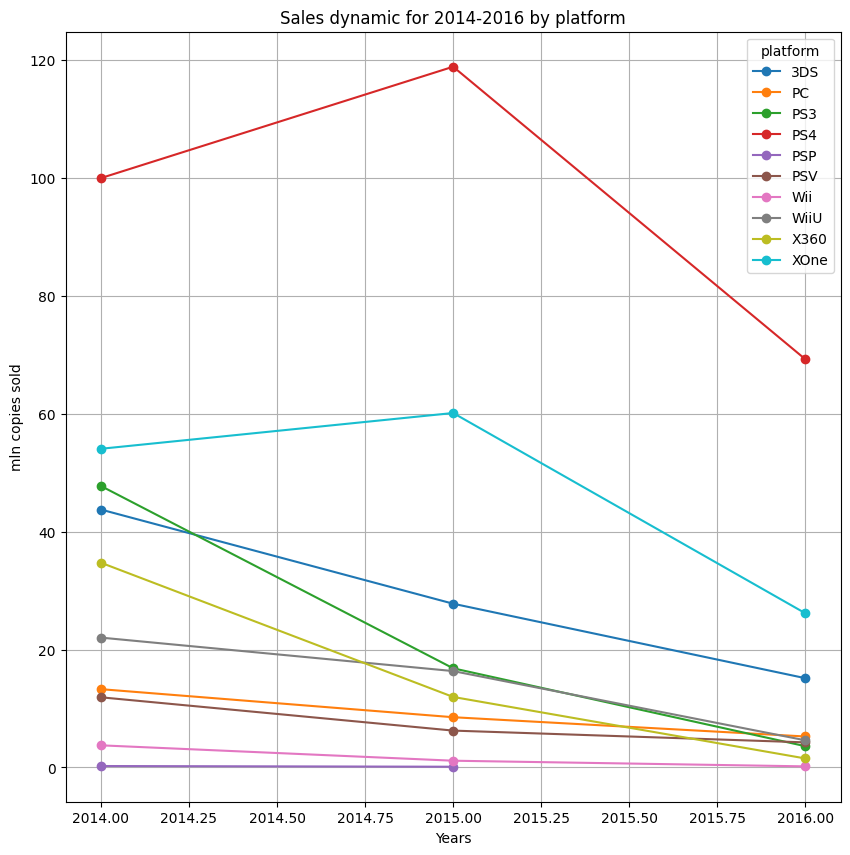

In [37]:
#making a pivot table of total sales by every year and platform 
forecast_data_agg = forecast_data.pivot_table(index= 'year_of_release', columns='platform', 
                          values='total_sales', aggfunc='sum')
forecast_data_agg.plot(title='Sales dynamic for 2014-2016 by platform', ylabel='mln copies sold', 
                   xlabel='Years', style='o-', grid=True, figsize=(10,10))
#making a plot

forecast_data_agg

As we can see by the plot by 2015 only two platforms are actually growing, these are PS4 and XOne. For 2016 (incomplete data) they are still top-2 platforms.

Both platforms were launched in 2013 and to our hypothesis (see above) could still grow in the upcoming year, then, reach the peak and hold it for several years, and only after steadily declining. 

On top-3 platforms, we can also see 3DS, whose sales declining, but still could bring a store a potential profit by the volume of sales.

#### Global game sales boxplot by platform

<Axes: >

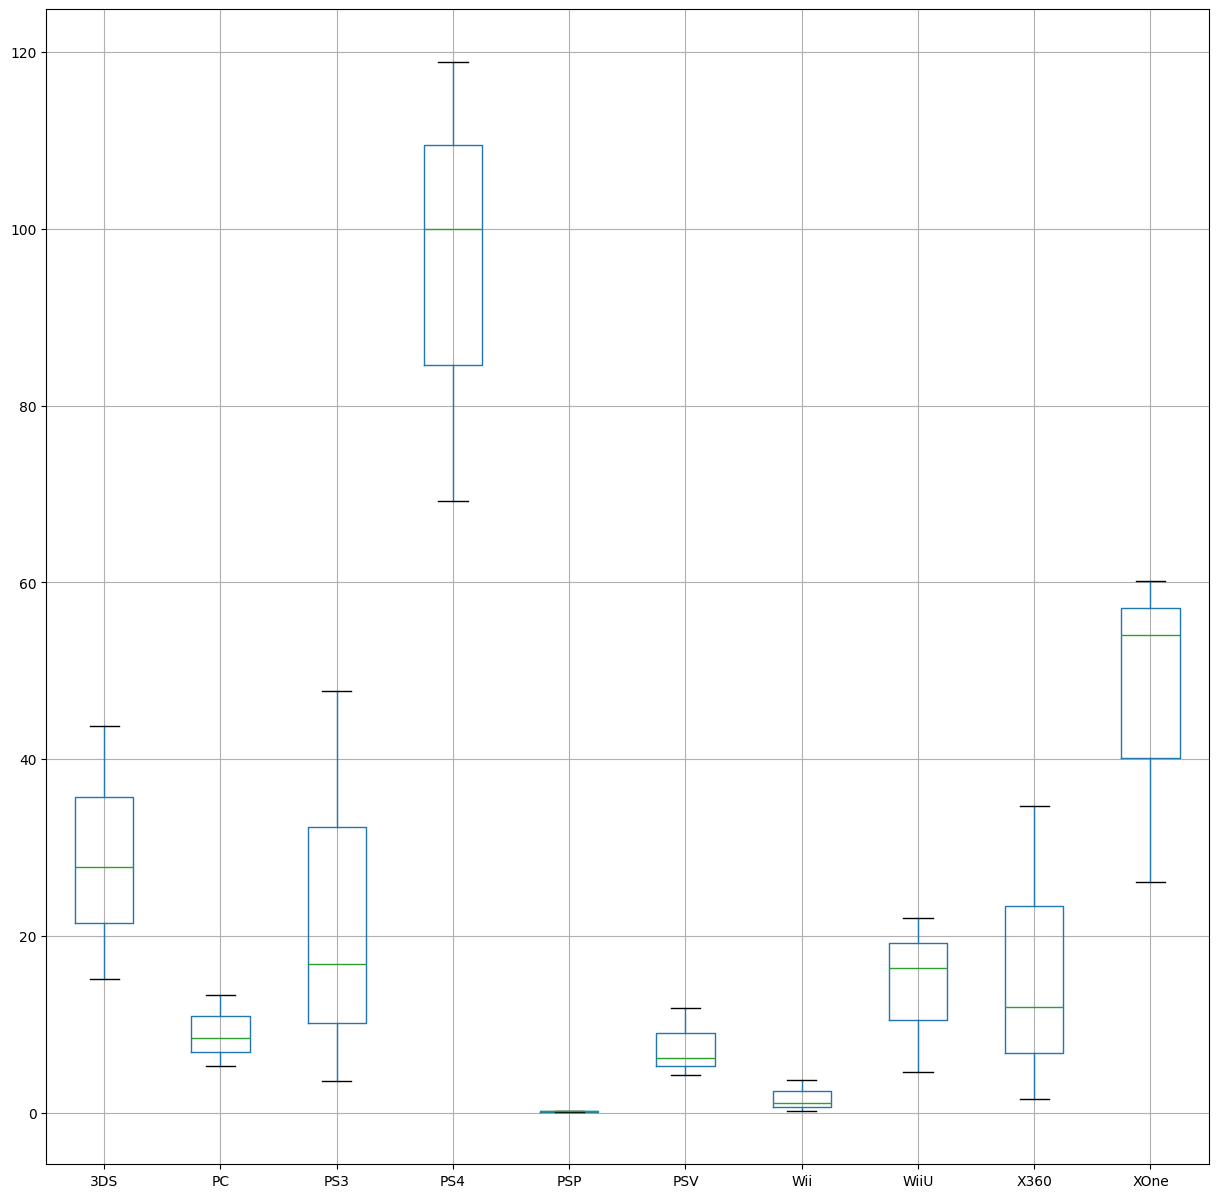

In [38]:
forecast_data_agg.boxplot(figsize=(15,15)) #making a boxplot by platoform and its sales

The boxplot reveals that the growth and decline of the platforms are within normal distribution, or in other words they are both developing steadily.

"Abnormal" are only Wii and PSP, both have low sales volume, apparently, these two are platforms "in decline" and we could see their last years on the market. PSP had no sales in 2016, the platform itself was replaced by PSV (PlayStation Vita). Wii was replaced by the next Wii generation - WiiU, which explains almost zero sales in 2016.

#### The relation between critic or users score and sales for PS4

In [39]:
data_PS4 = forecast_data.query('platform == "PS4"') #making a dataframe with PS4 data

0.40266141068104083

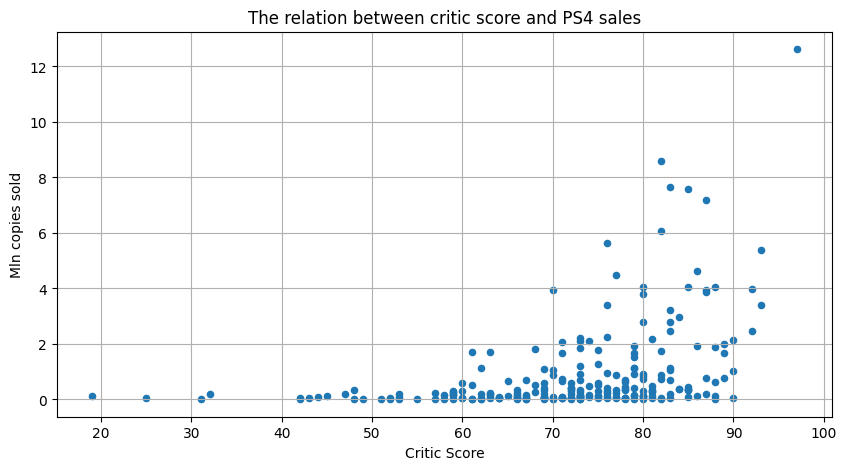

In [41]:
#making a sales scatter plot by critic score

data_PS4.plot(x='critic_score', y='total_sales', kind='scatter', 
              title='The relation between critic score and PS4 sales', xlabel='Critic Score', 
              ylabel='Mln copies sold', grid=True, figsize=(10,5))

#count a correlation between critic score and sales

data_PS4['critic_score'].corr(data_PS4['total_sales'])

The scatter plot and correlation coefficient demonstrate that there is a weak correlation between critic score and sales - a very small amount of games with good score has high sales.

We could state that:
- if a rating is below 50, then the sales would not reach even one mln copies sold
- if a rating is more than 90, there would be several mln (2+) copies sold

-0.040131589472697356

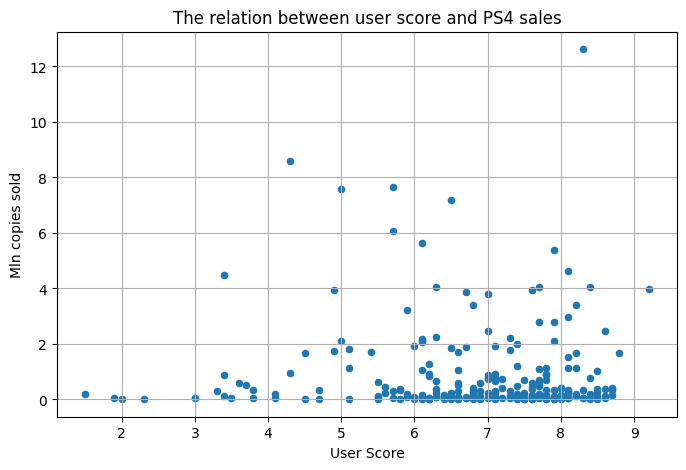

In [42]:
#making a sales scatter plot by user score

data_PS4.plot(x='user_score', y='total_sales', kind='scatter', 
              title='The relation between user score and PS4 sales', xlabel='User Score', 
              ylabel='Mln copies sold', grid=True, figsize=(8,5))

#calculating a correlation between user score and sales

data_PS4['user_score'].corr(data_PS4['total_sales'])

There is no correlation between user rating and sales for PS4. From the graph, we can see that high sales are for the games from 3 to 10. 

Without a doubt, we could state that games with a rating equals to 3 or below are hard to sell, but there is a too small amount of data available for that rating.

#### The relation between critic or users score and sales for top-5 platforms (exp PS4)

In [43]:
#forming a list of platforms, calculating a total sales and sorting descending
#taking top-5 platforms

list_of_platforms = forecast_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(5) 

list_of_platforms

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


In [44]:
#forming a list

top_5_list = list_of_platforms.index

top_5_list

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360'], dtype='object', name='platform')

In [45]:
#filtering forecast data by top-5 platforms list except PS4

top_5_data = forecast_data.query('platform in @ top_5_list & platform != "PS4"')

-0.05285553045768629

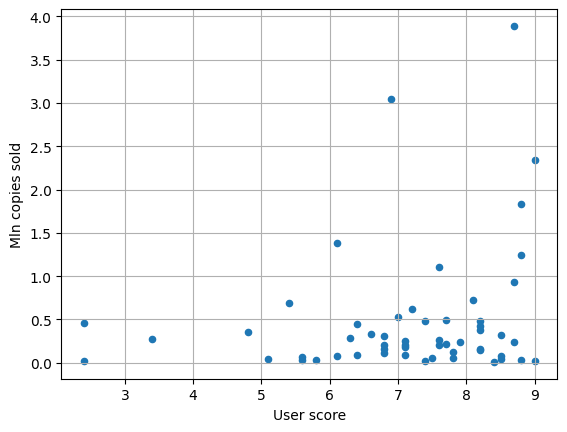

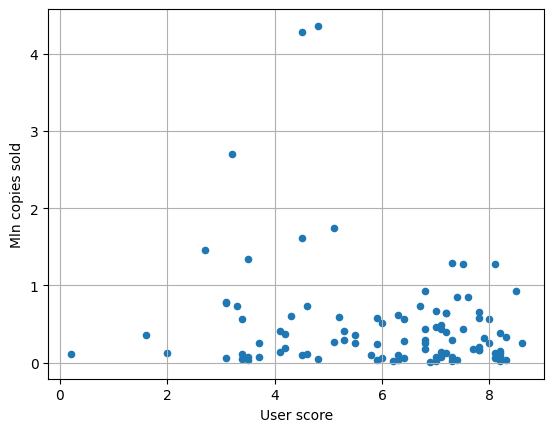

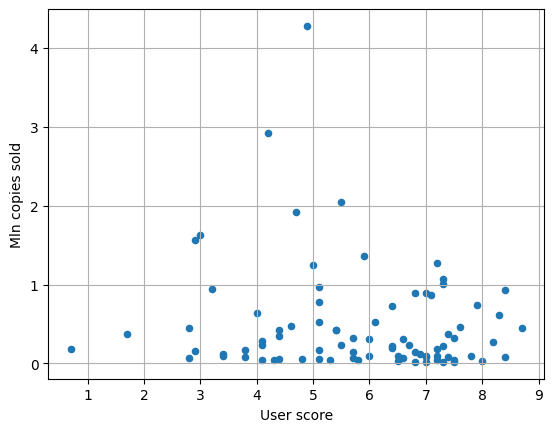

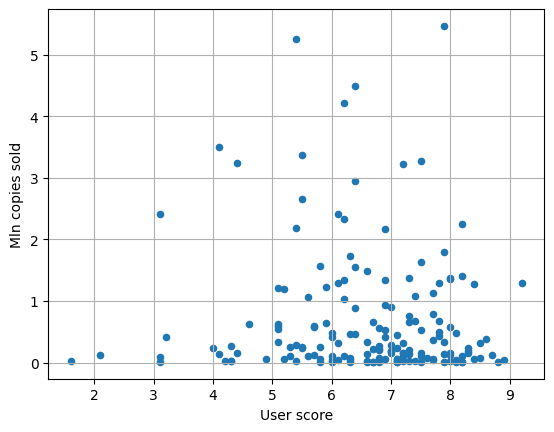

In [46]:
#making a sales scatter plot by user score for top-5 platform (apart from PS4)
top_5_data.groupby('platform').plot(x='user_score', y='total_sales', 
                                    kind='scatter', xlabel='User score', 
                                    ylabel='Mln copies sold', grid=True)

#calculating a correlation coefficient between user score and sales

top_5_data['total_sales'].corr(top_5_data['user_score'])

0.41542412510149457

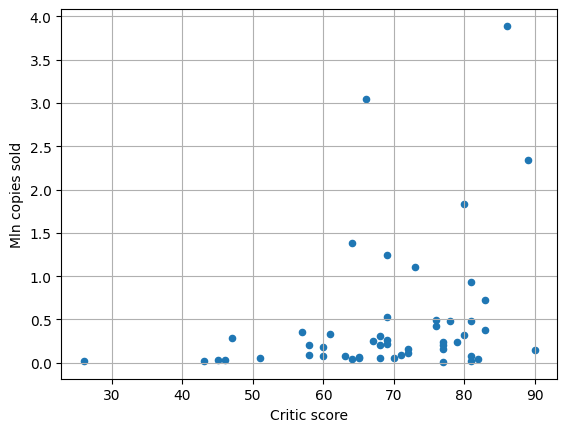

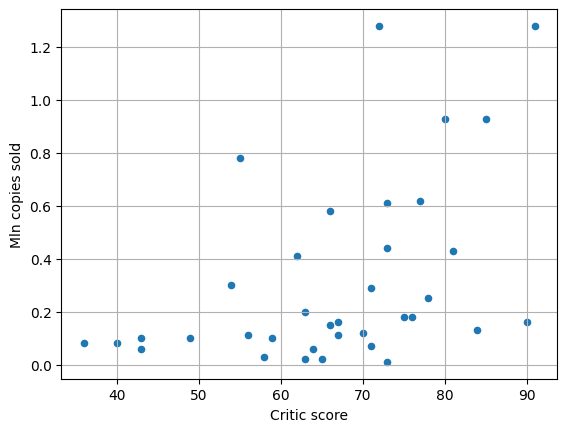

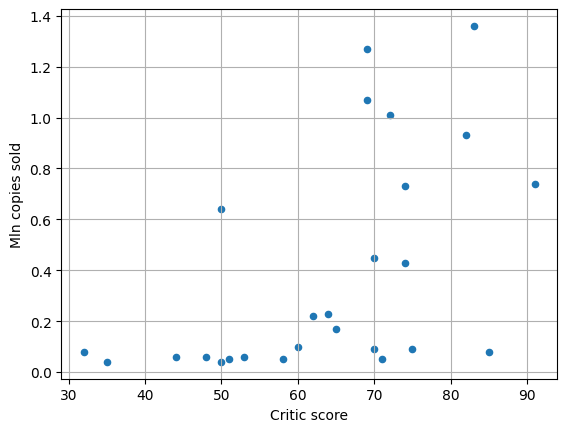

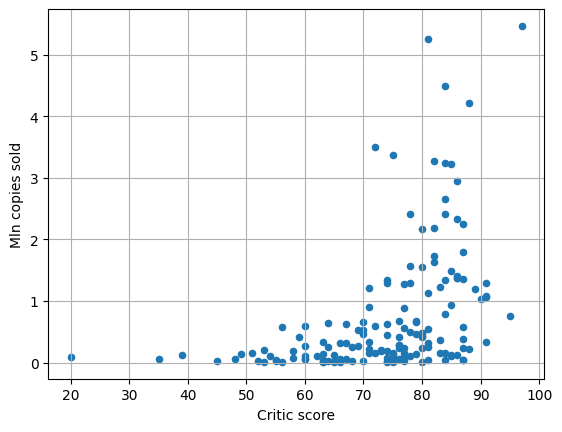

In [47]:
#making a sales scatter plot by critic score for top-5 platform (apart from PS4)
top_5_data.groupby('platform')\
.plot(x='critic_score', y='total_sales', kind='scatter', xlabel='Critic score', 
      ylabel='Mln copies sold', grid=True)

#calculating a correlation coefficient between critic score and sales for top-5 platforms
top_5_data['critic_score'].corr(top_5_data['total_sales'])

After analysis of the rest four platforms from top-5 we can comfirm the primary outcome. **Between user score and sales there is no correlation, between critic score and sales there is weak correlation.**

#### Games distribution by genre.

In [48]:
#forming the full top-5 platform data slice

top_5_data_full = forecast_data.query('platform in @ top_5_list')

,total_sales
genre,
Action,175.17
Shooter,159.68
Sports,105.88
Role-Playing,88.95
Misc,26.32
Fighting,21.55
Racing,19.69
Adventure,14.47
Platform,10.97


<Axes: xlabel='genre'>

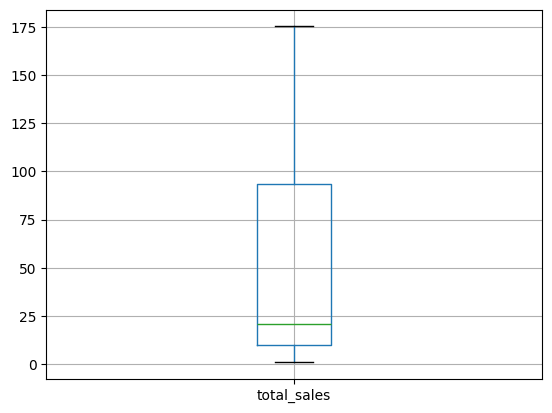

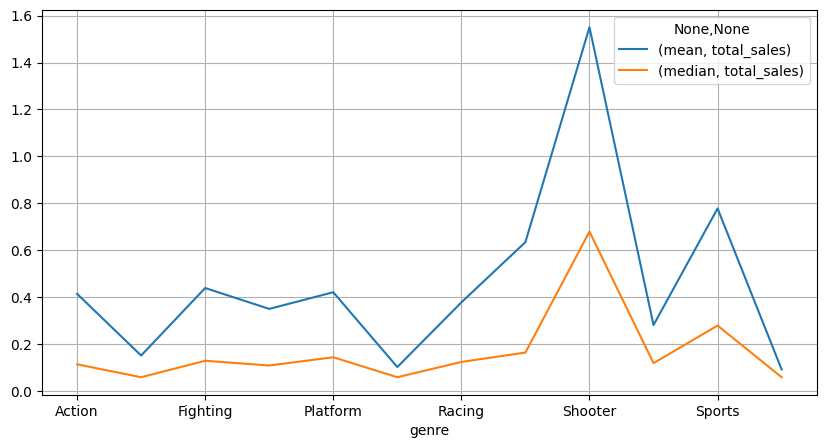

In [50]:
#aggregating data by genre, summarising the sales, sorting in descending order

top_5_by_genre_agg = top_5_data_full.pivot_table(index='genre', 
                                                 values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False) 

display(top_5_by_genre_agg)

#making a boxplot by sales

top_5_data_full.pivot_table(index='genre', values='total_sales', aggfunc='sum').boxplot()

#visualising mean and median

top_5_data_full.pivot_table(index='genre', values='total_sales', 
                            aggfunc=['mean', 'median']).plot(figsize=(10,5), grid=True)

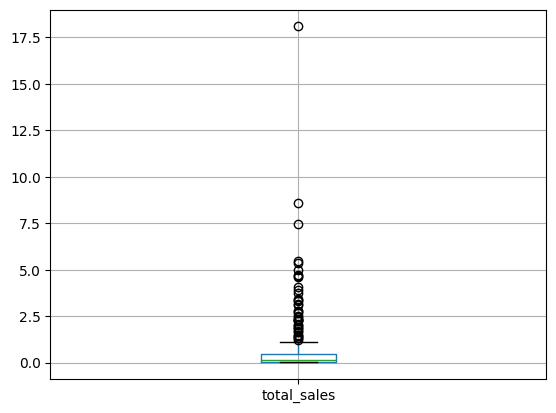

In [55]:
#visualising a range of sales in Action genre

top_5_data_full.query('genre== "Action"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum')\
.boxplot()
plt.show()

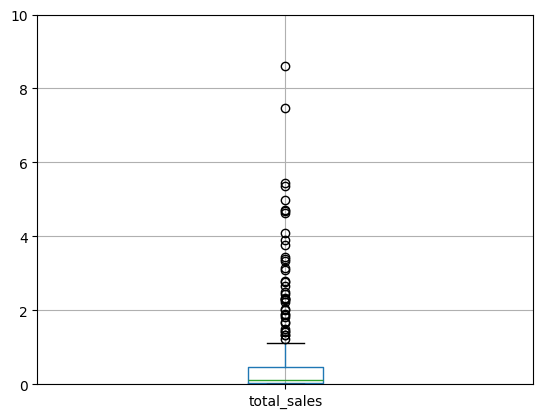

In [56]:
#and the range without max

top_5_data_full.query('genre== "Action"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum')\
.boxplot()
plt.ylim(0,10)
plt.show()

In [57]:
#looking at max value (outlier)

top_5_data_full.query('genre== "Action"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(1)

,total_sales
name,
Grand Theft Auto V,18.09


<Axes: >

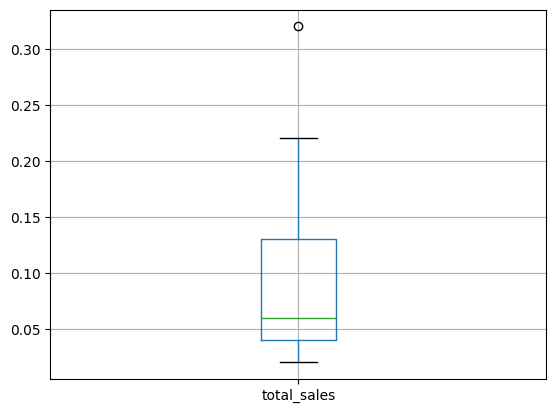

In [58]:
#visualising a sales range in Strategy genre

top_5_data_full.query('genre== "Strategy"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum').boxplot()

In [59]:
#display outliers and max value for the range (first three values)


top_5_data_full.query('genre== "Strategy"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(3)

,total_sales
name,
Dragon Ball Heroes: Ultimate Mission 2,0.32
Code Name: S.T.E.A.M.,0.22
State of Decay,0.21


<Axes: >

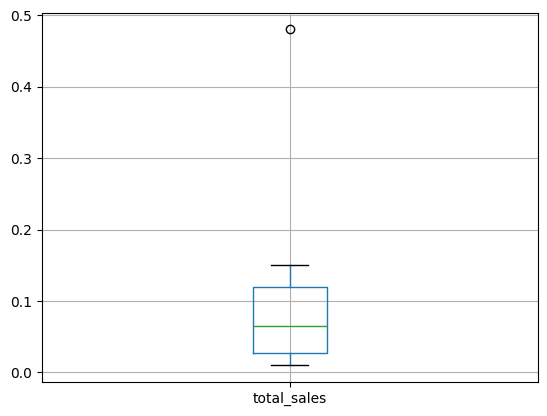

In [60]:
#dislay sales range for Puzzle genre

top_5_data_full.query('genre== "Puzzle"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum').boxplot()

In [62]:
#display outliers and max value for the range

top_5_data_full.query('genre== "Puzzle"')\
.pivot_table(index='name', values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False).head(4)

,total_sales
name,
Puzzle & Dragons Z + Super Mario Bros. Edition,0.48
Puyo Puyo Tetris,0.15
Picross 3D 2,0.11
Cut the Rope,0.07


The most profitable genres are Action and Shooter. The first one is out of normal span, in other words, it is not within the typical range compared to other genres, shooters are on the border of normal span from total sales. As we can see by sales median and mean, shooter is the leading genre. On average games of this genre are more popular in sales, while Action, apparently, leads only because of a few games which brings the genre to the leading in total sales by genre. 

Having a closer look at the Action genre we can see that the normal span of sales for it is about 1,5 mln copies but many values are outliers up to 10 mln copies, and there is even one value that is more than 17 mln copies sold (Grand Theft Auto V). 

Apparently, this game and some others at the top significantly shift the whole picture of sales. In fact, action is not the most sold genre if we look at the average.

The least popular genres are Strategy и Puzzle, perhaps, they are just not so convenient for platforms in top-5. A good result for such genres would be sales of more than 250 thousand copies sold.

### User portrait by region

#### User for every region (NA, EU, JP):

<Axes: title={'center': 'Platform sales by platform'}, xlabel='Platform', ylabel='Mln copies sold'>

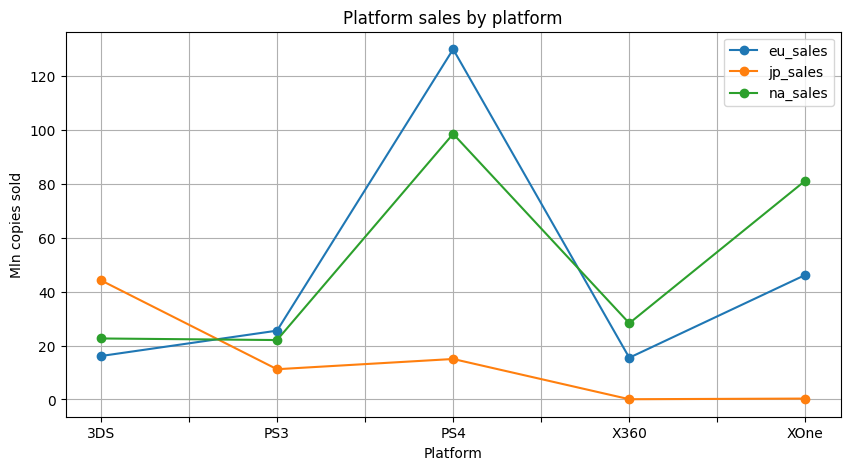

In [63]:
top_5_data_full.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                            aggfunc='sum')\
.plot(xlabel='Platform', ylabel='Mln copies sold', 
      title='Platform sales by platform', style='o-', figsize=(10,5), grid=True)
#aggregating sales data by platform and region
#building a graph

As we can see from the graph, different regions have different platform leaders.

In Europe and North America the leader is PS4 with more than 100 mln copies sold, in Japan PS4 is only second with less than 20 mln (which is twice less than the leader).

In NA XOne sales are close to the leader with more than 80 mln copies sold. In Japan, the leader is Nintendo 3DS with 40 mln copies sold, in NA and EU this platform is only on the 4th out of 5 (about 20 mln both).

We need to note that PS3 и PS4, and X360 и XOne are different generations of the same platform, which allows us to merge their sales and group the sales by these companies. Let's have a look at such a graph.

In [65]:
grouped_top_5_data_full = top_5_data_full.copy()
#making a separate df

<Axes: title={'center': 'Platform Sales by Region'}, xlabel='Platform', ylabel='Mln copies sold'>

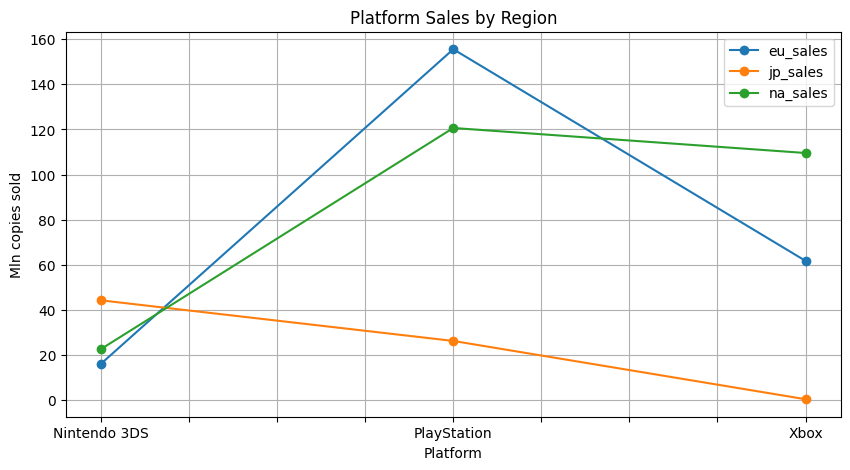

In [67]:
#writing a function for the platform sales merge
def group_platform(row):
    try:
        if 'P' in row:
            return "PlayStation"
        if 'X' in row:
            return "Xbox" 
    except:
        return 'Nintendo 3DS'

grouped_top_5_data_full['platform'] = grouped_top_5_data_full['platform']\
.apply(group_platform)
#applying the function
grouped_top_5_data_full\
.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], 
                            aggfunc='sum')\
.plot(xlabel='Platform', ylabel='Mln copies sold', 
      title='Platform Sales by Region', style='o-', figsize=(10,5), grid=True)
#aggregating sales data by platform and region 
#building a graph

In general, the top has not changed, but we can confirm that PlayStation is leading in Europe. In Japan, the leader is the Nintendo 3DS. In North America, the total sales of PlayStation are slightly more than Xbox sales, although the Xbox NA is still the number 1 market.

#### The most popular genres (top-5)

In [68]:
#making top-5 genre list

top_5_by_genre_list = top_5_by_genre_agg.head().index

#filter data by top-5 genre list

top_5_by_genre = top_5_data_full.query('genre in @ top_5_by_genre_list')

<Axes: title={'center': 'Genre sales by region'}, xlabel='Genre', ylabel='Mln copies sold'>

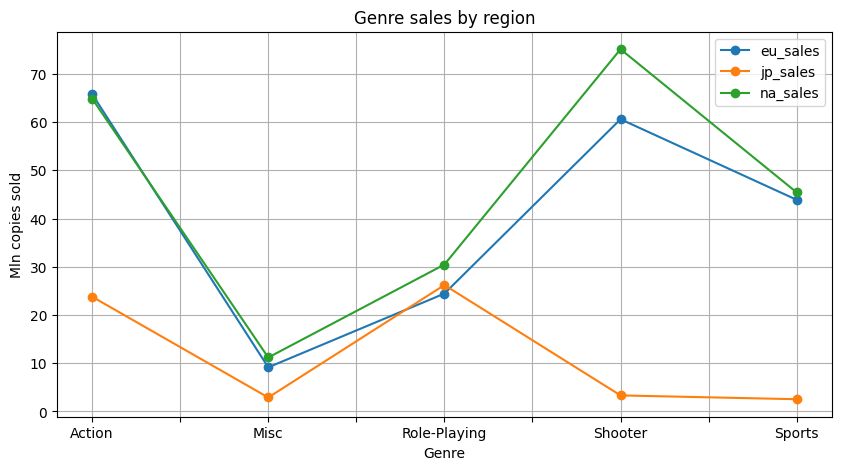

In [69]:
#aggregating data by genre and sales and building a graph

top_5_by_genre.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], 
                            aggfunc='sum')\
.plot(xlabel='Genre', ylabel='Mln copies sold', 
      title='Genre sales by region', style='o-', figsize=(10,5), grid=True)

In every region Action is popular, it is in second place.

Shooter is the number one genre for North America and Europe, and only third for Japan.

Sport is in third place for Europe and North America, but one of the last for Japan.

Japan's rating is shifted as the most popular genre for the country is role-playing, although in other regions it is in 4th place.

On the last place in the top-5 for every region is misc - that is compilation genre, non-defined.

Generally, all regions have similar distribution apart from Japan's non-typical popularity of the role-playing genre.

#### The relation between ESRB rating on sales by region

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,49.46,5.47,42.38,13.75
E10+,18.12,2.37,25.28,6.11
M,85.02,7.03,90.82,27.22
No rating,52.76,45.65,59.98,17.20
T,28.08,10.36,34.41,10.12


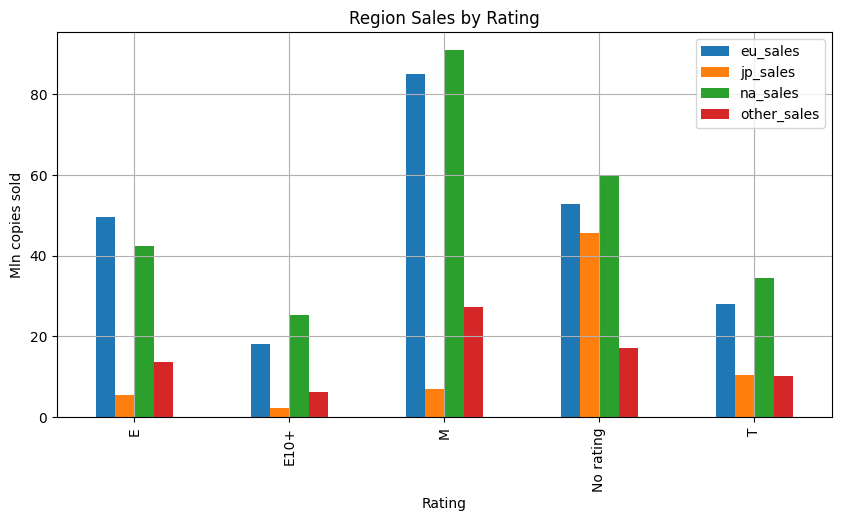

In [70]:
#group total sale data by region
#building a barplot

top_5_data_full.pivot_table(index='rating', 
                            values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')\
.plot.bar(grid=True, figsize=(10,5)) #(kind='bar', x='rating', y='na_sales')
plt.xlabel('Rating')
plt.ylabel('Mln copies sold')
plt.title('Region Sales by Rating')

top_5_data_full.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

As the graph stated the most sales are for the games with a rating M (Mature, 17+), for the regions except Japan. For Japan the most popular games have no rating, this could be true because Japan has a big local market, which is not rated by ESRB, but by a local rating agency called Computer Entertainment Rating Organization (CERO), which is not reflected on the graph.

No rating games are also popular in the EU and NA, with this category in second place, perhaps this category also includes games not rated by ESRB.

Category E (Everyone, 0+), in turn, is in third place for NA and EU, and in 4th place for Japan.

The smallest category is E10+ (Everyone 10+) for all regions.

Thus, we can state that for all regions games with the 'No rating' category would be good-selling. Along with that in Europe and North America, the bestsellers would be for the adult category (M).

#### User Portrait by Region:

- North America. The user is playing on PlayStation or Xbox (more likely PS4 and Xbox360 respectively) games in a shooter or action genre with an age rating М (17+).
- Europe. The user is playing on PlayStation (likely, PS4) shooter or action game with an age rating М (17+).
- Japan. The user is playing on Nintendo 3DS role or action game with no ESRB rating.

### Hypothesis testing

#### Average user scores for the platforms Xbox One and PC are the same

- H0: Average user scores for the platforms Xbox One and PC are the same
- H1: Average user scores for the platforms Xbox One and PC are not the same

In [71]:
data_xbox_one = forecast_data.query('platform == "XOne" & user_score>0')
#making a data slice for the platform XOne wihtout null values
data_pc = forecast_data.query('platform == "PC" & user_score>0')
#making a data slice for the platform PC wihtout null values

alpha = 0.05 #determine a level of statistical significance

outcome = st.ttest_ind(data_xbox_one['user_score'], data_pc['user_score'])
#testing a hypothesis about scores equality with a t-test

print(f'p-value: {outcome.pvalue}')#display the value

# checking a p-value and making a conclusion
if outcome.pvalue < alpha:
    print('Average user scores for the platforms Xbox One and PC are not the same')
else:
    print('Average user scores for the platforms Xbox One and PC are the same')

p-value: 0.10450507919348415
Average user scores for the platforms Xbox One and PC are the same


In [72]:
print(round(data_xbox_one['user_score'].mean(), 2), round(data_pc['user_score'].mean(), 2))
#display mean for xbox и PC

6.59 6.3


To test the hypothesis 'Average user scores for the platforms Xbox One and PC are the same' we could run a two-tailed t-test for two samples.
The alternative hypothesis would be 'Average user scores for the platforms Xbox One and PC are not the same', since we do not need to know if the score for the other sample would be more or less.

The test revealed that the average user score with a high probability might be equal.

#### Average Action and Sports User Scores are different

- H0: Average Action and Sports User Scores are the same
- H1: Average Action and Sports User Scores are different

In [73]:
data_genre_action = forecast_data.query('genre == "Action" & user_score>0')
#making a data slice for Action genre wihtout null values
data_genre_sports = forecast_data.query('genre == "Sports" & user_score>0')
#making a data slice for Sports genre wihtout null values


outcome1 = st.ttest_ind(data_genre_action['user_score'], data_genre_sports['user_score'])
#testing a hypothesis about user scores equality with a help of t-test for two samples

print(f'p-value: {outcome1.pvalue}')#display an outcome

# checking a p-value and making a conclusion
if outcome1.pvalue < alpha:
    print('Average Action and Sports User Scores are different')
else:
    print('Average Action and Sports User Scores are the same')

p-value: 2.8711147985105864e-19
Average Action and Sports User Scores are different


In [74]:
print(round(data_genre_action['user_score'].mean(), 2), round(data_genre_sports['user_score'].mean(), 2))
#display mean for Action and Sport genres

6.76 5.23


The same two-tailed t-test is applicable for the second hypothesis. The null hypothesis is "Average Action and Sports User Scores are the same", the alternative is "Average Action and Sports User Scores are different".

Since we do not need to know if one rating is less or more than the other, we could run a two-tailed test.

The test revealed that with a high probability scores of the genres Action and Sports would be different.

### General conclusion

- Generally, gaming industry is in recession - over the past few years only few hundreds of games (up to 400) have been released per year across all platforms, while at the peak in 2008-2009 this number was more than 1000 games. Strategic advertising campaigns are cruicial for the current moment.
- Platform life cycle is 10 years: 1/3 period of growth, 1/3 peak of popularity, 1/3 decline in sales.
- Based on sales dynamics over the past few years (2014-16), for 2017 we can highlight two growing platforms **PS4 and XOne**; **3DS** also demonstrates a large sales volume in Japan. Store should allocate ads budjet on games for these platforms.
- The commercial success of a game is not dependent on critical score or user score - even a game with a modest user rating can have good sales.


#### User's Portrait by Region:
- **North America**. A user plays a shooter or action game with an M rating on PlayStation or Xbox
- **Europe**. A user plays a shooter or action game on a PlayStation (most likely PS4) with an M rating.
- Japan. A user plays an unrated RPG or action game on Nintendo 3DS.

#### Executive Summary:

- The company should invest on games ads for PS4 (EU and NA) and XOne (NA). These platforms are in a growth phase: sales will increase or remain at the same high level.For the Japan ads budjet should be spent on Nintendo 3DC.

- the company should invest in games of the Shooter and Sports genres with age ratings M or without rating.